### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura (X) y la edad(y) de los alumnos de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [24]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics

In [25]:
lista_alumnos = [("Clara Piniella", 30, 1.66),("Daniel Walker", 34, 1.87), ("Leonardo Frazzetto", 31, 1.78),("Xinru Yang", 24, 1.60), ("Jorge Garcia", 28, 1.79), ("Jonathan Suárez", 27, 1.86),("Marina Serrano", 25, 1.54), ("Karina Inche", 30, 1.61), ("Mary Meza", 32, 1.52),("Borja Puig", 37, 1.82), ("Mauro Garcia-Oliva", 45, 1.77), ("José Carlos Batista", 28, 1.70),("Isabel Palomares",24,1.78),("Gina Garrido",57,1.63), ("Sonia Cobo", 29, 1.73), ("Miguel Barquero", 35, 1.85),("Nacho Astorga",47,1.78), ("Adrià Gallardo", 24, 1.70), ("Juan Bayon", 38, 1.64), ("Nacho Fontal", 35, 1.82),("Pablo Martínez",28,1.81),("Javier Araiz Miranda", 30, 1.80)]

In [26]:
df = pd.DataFrame(lista_alumnos)
df

,0,1,2
0,Clara Piniella,30,1.66
1,Daniel Walker,34,1.87
2,Leonardo Frazzetto,31,1.78
3,Xinru Yang,24,1.60
4,Jorge Garcia,28,1.79
5,Jonathan Suárez,27,1.86
6,Marina Serrano,25,1.54
7,Karina Inche,30,1.61
8,Mary Meza,32,1.52
9,Borja Puig,37,1.82


0.2492497331265664

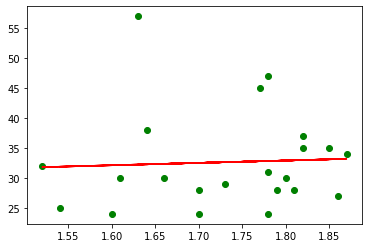

In [38]:
df.columns = ["Nombre","Edad","Altura"]
df
y = df["Edad"]
X = df["Altura"]
X = np.array(X)
X = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lm = LinearRegression(n_jobs=-1) 
lm.fit(X_train, y_train)
lm.fit(X,y)
plt.scatter(X, y, color='g')
plt.plot(X, lm.predict(X), color='red')
lm.score(X, y) * 100

In [28]:
df

,Nombre,Edad,Altura
0,Clara Piniella,30,1.66
1,Daniel Walker,34,1.87
2,Leonardo Frazzetto,31,1.78
3,Xinru Yang,24,1.60
4,Jorge Garcia,28,1.79
5,Jonathan Suárez,27,1.86
6,Marina Serrano,25,1.54
7,Karina Inche,30,1.61
8,Mary Meza,32,1.52
9,Borja Puig,37,1.82


<AxesSubplot:>

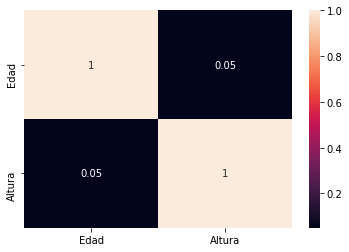

In [29]:
sns.heatmap(df.corr(), annot=True)


### No hay correlación entre altura y edad, por lo que no es una buena técnica para este problema

In [30]:
y_test_predict = lm.predict(X_test)
y_test_predict

array([32.99256416, 32.63636364, 32.87383065, 32.95298633, 32.1614296 ])

In [31]:
y_test = np.array(y_test)
y_test

array([35, 29, 28, 28, 30], dtype=int64)

In [32]:
error= []
for pos,valor in enumerate(y_test_predict):
    error.append(valor-y_test[pos])
error

[-2.0074358359318794,
 3.636363636363633,
 4.8738306548332915,
 4.952986327656511,
 2.1614295994243236]

In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

MAE: 3.5264092108419276
MSE: 14.04220317169278
RMSE: 3.747292779019646


0.2492497331265664

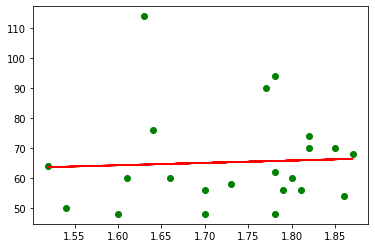

In [39]:
df.columns = ["Nombre","Edad","Altura"]
df
y = df["Edad"]*2
X = df["Altura"]
X = np.array(X)
X = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lm = LinearRegression(n_jobs=-1) 
lm.fit(X_train, y_train)
lm.fit(X,y)
plt.scatter(X, y, color='g')
plt.plot(X, lm.predict(X), color='red')
lm.score(X, y) * 100

0.2492497331265664

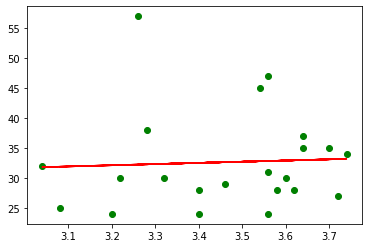

In [40]:
df.columns = ["Nombre","Edad","Altura"]
df
y = df["Edad"]
X = df["Altura"]*2
X = np.array(X)
X = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lm = LinearRegression(n_jobs=-1) 
lm.fit(X_train, y_train)
lm.fit(X,y)
plt.scatter(X, y, color='g')
plt.plot(X, lm.predict(X), color='red')
lm.score(X, y) * 100